In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

xls = pd.ExcelFile('aggregated_backup.xlsx')
df = pd.read_excel(xls, 'Main')
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 44 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GMDNAME                                 2142 non-null   object 
 1   KTNAME                                  2142 non-null   object 
 2   LAT_CNTR                                2142 non-null   float64
 3   LONG_CNTR                               2142 non-null   float64
 4   HEIGHT_CNTR                             2142 non-null   float64
 5   BEVDICHTE_SQKM_ 2019                    2142 non-null   float64
 6   AUSLAENDER_ANTEIL_2019                  2142 non-null   float64
 7   ALTERSVERTEILUNG_ANTEIL_0_19_ 2019      2142 non-null   float64
 8   ALTERSVERTEILUNG_ANTEIL_20_64_ 2019     2142 non-null   float64
 9   ALTERSVERTEILUNG_ANTEIL_65PLUS_ 2019    2142 non-null   float64
 10  PRIVATHAUSHALTE_2019                    2142 non-null   int6

In [ ]:
#df = df[df["Anzahl Filialen Migros"] != 0]

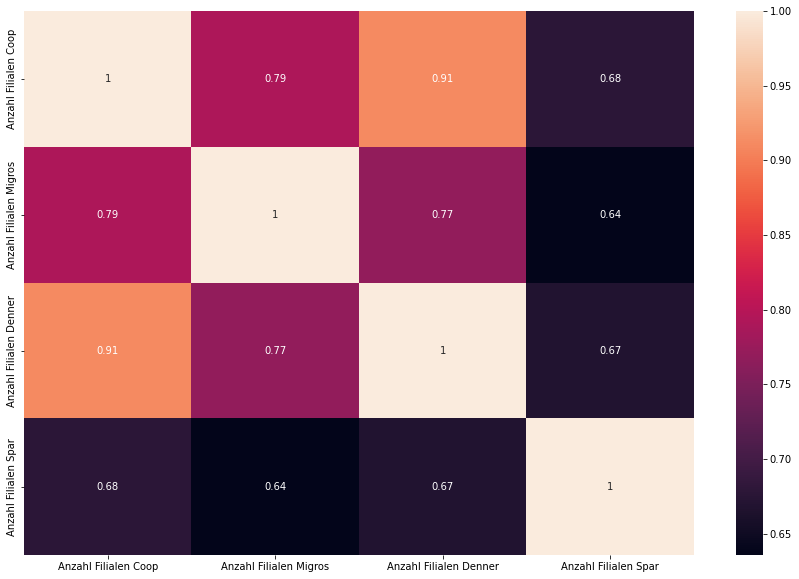

In [ ]:
import seaborn as sns

correlation_matrix = df[["Anzahl Filialen Coop","Anzahl Filialen Migros","Anzahl Filialen Denner","Anzahl Filialen Spar"]].corr()
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(correlation_matrix, xticklabels = correlation_matrix.columns, yticklabels = correlation_matrix.columns, annot=True)

#Bagging (5 random splits, ohne zurücklegen)

In [7]:
# Shuffle rows of initial dataframe
shuffled = df.sample(frac=1)

# Split it into 5 parts with same size (5 test sets)
result = np.array_split(shuffled, 5)

In [8]:
# Select test data sets
test_set1 = result[0]
test_set2 = result[1]
test_set3 = result[2]
test_set4 = result[3]
test_set5 = result[4]

In [9]:
# Select the rows not contained in test, as train data set
train_set1 = df[~df.isin(test_set1)].dropna()
train_set2 = df[~df.isin(test_set2)].dropna()
train_set3 = df[~df.isin(test_set3)].dropna()
train_set4 = df[~df.isin(test_set4)].dropna()
train_set5 = df[~df.isin(test_set5)].dropna()

In [10]:
# Split it up into X and y for the 5 sets
Supermarkt = "Anzahl Filialen Migros"

X_train1 = train_set1.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR', Supermarkt],axis=1)
X_test1 = test_set1.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR', Supermarkt],axis=1)
y_train1 = train_set1[Supermarkt]
y_test1 = test_set1[Supermarkt]


X_train2 = train_set2.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR', Supermarkt],axis=1)
X_test2 = test_set2.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR', Supermarkt],axis=1)
y_train2 = train_set2[Supermarkt]
y_test2 = test_set2[Supermarkt]


X_train3 = train_set3.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR', Supermarkt],axis=1)
X_test3 = test_set3.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR', Supermarkt],axis=1)
y_train3 = train_set3[Supermarkt]
y_test3 = test_set3[Supermarkt]


X_train4 = train_set4.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR', Supermarkt],axis=1)
X_test4 = test_set4.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR', Supermarkt],axis=1)
y_train4 = train_set4[Supermarkt]
y_test4 = test_set4[Supermarkt]


X_train5 = train_set5.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR', Supermarkt],axis=1)
X_test5 = test_set5.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR', Supermarkt],axis=1)
y_train5 = train_set5[Supermarkt]
y_test5 = test_set5[Supermarkt]

#Linear Regression Migros

In [11]:
# Training linear regressions for the 5 data sets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

linreg1 = LinearRegression().fit(X_train1, y_train1)
linreg2 = LinearRegression().fit(X_train2, y_train2)
linreg3 = LinearRegression().fit(X_train3, y_train3)
linreg4 = LinearRegression().fit(X_train4, y_train4)
linreg5 = LinearRegression().fit(X_train5, y_train5)

In [12]:
# Predict for each test set
linreg_pred1= linreg1.predict(X_test1)
linreg_pred2= linreg2.predict(X_test2)
linreg_pred3= linreg3.predict(X_test3)
linreg_pred4= linreg4.predict(X_test4)
linreg_pred5= linreg5.predict(X_test5)

In [13]:
# Clip negative predictions to zero, as we do not want negative store numbers
linreg_pred1 = linreg_pred1.clip(min = 0)
linreg_pred2 = linreg_pred2.clip(min = 0)
linreg_pred3 = linreg_pred3.clip(min = 0)
linreg_pred4 = linreg_pred4.clip(min = 0)
linreg_pred5 = linreg_pred5.clip(min = 0)

In [14]:
# Evaluate performance
R2 = linreg1.score(X_train1, y_train1)
RMSE = mean_squared_error(y_test1, linreg_pred1, squared=False)
MAPE= mean_absolute_percentage_error(y_test1, linreg_pred1)

print(R2)
print(RMSE)
print(MAPE)

0.7583103446091777
0.61082481574722
652138613560585.0


In [15]:
# Evaluate performance
R2 = linreg2.score(X_train2, y_train2)
RMSE = mean_squared_error(y_test2, linreg_pred2, squared=False)
MAPE= mean_absolute_percentage_error(y_test2, linreg_pred2)

print(R2)
print(RMSE)
print(MAPE)

0.7863684792710124
0.9489105945483168
613486367929208.0


In [16]:
# Evaluate performance
R2 = linreg3.score(X_train3, y_train3)
RMSE = mean_squared_error(y_test3, linreg_pred3, squared=False)
MAPE= mean_absolute_percentage_error(y_test3, linreg_pred3)

print(R2)
print(RMSE)
print(MAPE)

0.4520839281656358
2.747590032176551
787823839887513.1


In [17]:
# Evaluate performance
R2 = linreg4.score(X_train4, y_train4)
RMSE = mean_squared_error(y_test4, linreg_pred4, squared=False)
MAPE= mean_absolute_percentage_error(y_test4, linreg_pred4)

print(R2)
print(RMSE)
print(MAPE)

0.8497249729664278
1.6470372114085272
739184033817724.8


In [18]:
# Evaluate performance
R2 = linreg1.score(X_train5, y_train5)
RMSE = mean_squared_error(y_test5, linreg_pred5, squared=False)
MAPE= mean_absolute_percentage_error(y_test5, linreg_pred5)

print(R2)
print(RMSE)
print(MAPE)

0.7630912213301719
1.350031883568047
539510235885070.5


#XGB Migros

In [112]:
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [125]:
parameters = {'max_depth': range(1,20),
              'min_child_weight': range(1,10),
              'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'n_estimators': [int(x) for x in np.linspace(10, 5000, num = 50)]}

In [127]:
xgb1 = XGBRegressor()
xgb_grid = RandomizedSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train1, y_train1)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[09:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1],
                                        'max_depth': range(1, 20),
                                        'min_child_weight': range(1, 10),
                                        'n_estimators': [10, 111, 213, 315, 417,
                                                         519, 621, 722, 824,
                                                         926, 1028, 1130, 1232,
                                                         1333, 1435, 1537, 1639,
                                                         1741, 1843, 1944, 2046,
                                                         2148, 2250, 2352, 2454,
                                                         2555, 2657, 2759, 2861,
   

In [157]:
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 10,
 'min_child_weight': 2,
 'n_estimators': 4083,
 'subsample': 0.5}

In [158]:
xgb1 = XGBRegressor(colsample_bytree=0.8,
                    max_depth=10,
                    min_child_weight=2,
                    n_estimators=4083,
                    subsample=0.5)
xgb1.fit(X_train1, y_train1)

[11:21:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, max_depth=10, min_child_weight=2,
             n_estimators=4083, subsample=0.5)

In [169]:
xgb_pred = xgb1.predict(X_test1)
xgb_pred = xgb_pred.clip(min=0)

In [170]:
# Evaluate performance
R2 = xgb1.score(X_train1, y_train1)
RMSE = mean_squared_error(y_test1, xgb_pred, squared=False)
MAPE= mean_absolute_percentage_error(y_test1, xgb_pred)

print(R2)
print(RMSE)
print(MAPE)

0.9999999644028341
1.1343052097650868
443293274275687.4


In [172]:
# Speichere das Modell
xgb1.save_model('xgb1_migros.json')

##XGB without RandomizedSearch

In [106]:
xgb1 = XGBRegressor().fit(X_train1, y_train1)
xgb2 = XGBRegressor().fit(X_train2, y_train2)
xgb3 = XGBRegressor().fit(X_train3, y_train3)
xgb4 = XGBRegressor().fit(X_train4, y_train4)
xgb5 = XGBRegressor().fit(X_train5, y_train5)

[09:18:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:18:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [108]:
xgb_pred1= xgb1.predict(X_test1)
xgb_pred2= xgb2.predict(X_test2)
xgb_pred3= xgb3.predict(X_test3)
xgb_pred4= xgb4.predict(X_test4)
xgb_pred5= xgb5.predict(X_test5)

In [86]:
# Saving the models
#xgb1.save_model('xgb1_migros.json')

In [87]:
xgb_pred1 = xgb_pred1.clip(min = 0)
xgb_pred2 = xgb_pred2.clip(min = 0)
xgb_pred3 = xgb_pred3.clip(min = 0)
xgb_pred4 = xgb_pred4.clip(min = 0)
xgb_pred5 = xgb_pred5.clip(min = 0)

In [88]:
# Evaluate performance
R2 = xgb1.score(X_train1, y_train1)
RMSE = mean_squared_error(y_test1, xgb_pred1, squared=False)
MAPE= mean_absolute_percentage_error(y_test1, xgb_pred1)

print(R2)
print(RMSE)
print(MAPE)

0.9622790147973024
0.6016397688187801
427810427138401.44


In [89]:
# Evaluate performance
R2 = xgb2.score(X_train2, y_train2)
RMSE = mean_squared_error(y_test2, xgb_pred2, squared=False)
MAPE= mean_absolute_percentage_error(y_test2, xgb_pred2)

print(R2)
print(RMSE)
print(MAPE)

0.9637818382855352
0.48040665591308107
441258824793577.3


In [25]:
# Evaluate performance
R2 = xgb3.score(X_train3, y_train3)
RMSE = mean_squared_error(y_test3, xgb_pred3, squared=False)
MAPE= mean_absolute_percentage_error(y_test3, xgb_pred3)

print(R2)
print(RMSE)
print(MAPE)

0.866340778233202
2.9543418499651306
598586673748714.5


In [26]:
# Evaluate performance
R2 = xgb4.score(X_train4, y_train4)
RMSE = mean_squared_error(y_test4, xgb_pred4, squared=False)
MAPE= mean_absolute_percentage_error(y_test4, xgb_pred4)

print(R2)
print(RMSE)
print(MAPE)

0.9658142653862241
1.0736124807065985
588328198927369.6


In [27]:
# Evaluate performance
R2 = xgb5.score(X_train5, y_train5)
RMSE = mean_squared_error(y_test5, xgb_pred5, squared=False)
MAPE= mean_absolute_percentage_error(y_test5, xgb_pred5)

print(R2)
print(RMSE)
print(MAPE)

0.9611464741939613
0.45589105798669444
355299898883483.7


# Alt: Test/Train Split Random

In [ ]:
from sklearn.model_selection import train_test_split

Supermarkt = "Anzahl Filialen Spar"

X = df.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR', Supermarkt],axis=1)
y = df[Supermarkt]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model = LinearRegression().fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred = y_pred.clip(min = 0)
y_pred = y_pred.round()

R2 = model.score(X_train, y_train)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
MAPE= mean_absolute_percentage_error(y_test, y_pred)

print(R2)
print(RMSE)
print(MAPE)

#print(y_pred)
#print(y_test)

0.6376218727737462
0.357109529660276
133076816360870.08


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model = XGBRegressor().fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred = y_pred.clip(min = 0)
y_pred = y_pred.round()

R2 = model.score(X_train, y_train)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
MAPE= mean_absolute_percentage_error(y_test, y_pred)

print(R2)
print(RMSE)
print(MAPE)

#print(y_pred)
#print(y_test)

0.9998610345694783
0.5216912322774342
238137460856293.72


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

model = RandomForestRegressor().fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred = y_pred.clip(min = 0)
y_pred = y_pred.round()

R2 = model.score(X_train, y_train)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
MAPE= mean_absolute_percentage_error(y_test, y_pred)

print(R2)
print(RMSE)
print(MAPE)

#print(y_pred)
#print(y_test)

0.9263457054397881
0.4136098341043249
147084902293593.22


In [ ]:
Supermarkets = ["Anzahl Filialen Migros", "Anzahl Filialen Coop", "Anzahl Filialen Denner", "Anzahl Filialen Spar"]

for supermarkt in Supermarkets:
    from sklearn.model_selection import train_test_split
    
    print(supermarkt)
    Supermarkt = supermarkt

    X = df.drop(['GMDNAME', 'KTNAME', 'LAT_CNTR', 'LONG_CNTR', 'HEIGHT_CNTR',Supermarkt],axis=1)
    y = df[Supermarkt]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
    
    
    
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

    model = LinearRegression().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred = y_pred.clip(min = 0)
    y_pred = y_pred.round()

    R2 = model.score(X_train, y_train)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)
    
    print("LinearRegression")
    print("Der R2 beträgt: "+ str(R2))
    print("Der RMSE beträgt: "+ str(RMSE))
    print("Der MAPE beträgt: "+ str(MAPE))

    #print(y_pred)
    #print(y_test)
    
    
    from xgboost import XGBRegressor


    model = XGBRegressor().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred = y_pred.clip(min = 0)
    y_pred = y_pred.round()

    R2 = model.score(X_train, y_train)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)
    
    print("XGBRegressor")
    print("Der R2 beträgt: "+ str(R2))
    print("Der RMSE beträgt: "+ str(RMSE))
    print("Der MAPE beträgt: "+ str(MAPE))
    #print(y_pred)
    #print(y_test)
    
    from sklearn.ensemble import RandomForestRegressor

    model = RandomForestRegressor().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred = y_pred.clip(min = 0)
    y_pred = y_pred.round()

    R2 = model.score(X_train, y_train)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)

    print("RandomForest")
    print("Der R2 beträgt: "+ str(R2))
    print("Der RMSE beträgt: "+ str(RMSE))
    print("Der MAPE beträgt: "+ str(MAPE))
    
    print("")
    print("")
    #print(y_pred)
    #print(y_test)

Anzahl Filialen Migros
LinearRegression
Der R2 beträgt: 0.5306876482843224
Der RMSE beträgt: 1.5792184477442035
Der MAPE beträgt: 336403333510401.3
XGBRegressor
Der R2 beträgt: 0.999982704076284
Der RMSE beträgt: 1.9494067665223724
Der MAPE beträgt: 365838625192561.3
RandomForest
Der R2 beträgt: 0.8839176028148289
Der RMSE beträgt: 1.8634526151545248
Der MAPE beträgt: 412094083550241.5


Anzahl Filialen Coop
LinearRegression
Der R2 beträgt: 0.7733033682758528
Der RMSE beträgt: 0.6057613215710331
Der MAPE beträgt: 218662166781760.9
XGBRegressor
Der R2 beträgt: 0.9999728730769923
Der RMSE beträgt: 1.4455572815844195
Der MAPE beträgt: 327993250172641.3
RandomForest
Der R2 beträgt: 0.9180840635316428
Der RMSE beträgt: 1.5983184440966374
Der MAPE beträgt: 294352916821601.2


Anzahl Filialen Denner
LinearRegression
Der R2 beträgt: 0.8312867671221659
Der RMSE beträgt: 0.6666666666666666
Der MAPE beträgt: 235482333457280.97
XGBRegressor
Der R2 beträgt: 0.999972738848012
Der RMSE beträgt: 0.944